# Question 2

## Data Description

The following problem is intended to illustrate alterations in performance and shape of distributions brought about by variations in covariance matrices.
- $\textbf{Training data}$: 'P2\_train.csv' consisting of 310 instances, 2 attributes +1 class label.
- $\textbf{Test data}$: 'P2\_train.csv' consisting of 90 instances, 2 attributes +1 class label.

Learn a binary classifier for the given data taking class conditional densities as normal density. Estimate the misclassification rates of both classes, plot the discriminant function and
iso-probability contours for the following cases:

a) Equal Diagonal $\Sigma_s$ of equal variances along both dimensions, $\Sigma_{0} = \Sigma_{1} = \left[ \begin{array}{rrrr} a & 0 \\ 0 & a \end{array}\right]$<br>
b) Equal Diagonal $\Sigma_s$ of unequal variances along different dimensions, $\Sigma_{0} = \Sigma_{1} = \left[ \begin{array}{rrrr} a & 0 \\ 0 & b \end{array}\right]$<br>
c) Arbitrary $\Sigma_s$ but shared by both classes, $\Sigma_{0} = \Sigma_{1} = \left[ \begin{array}{rrrr} a & b \\ c & d \end{array}\right]$<br>
d) Different arbitrary $\Sigma_s$ for 2 classes



## Importing Libraries

In [292]:
import numpy as np
import matplotlib.pyplot as plt

## Training

Procedure will be the same as question 1.

### Importing data

P2_train has 3 columns<br>
first 2 are features and the last column is class label [$y_i \in  \{0,1\}, \forall i$ ]

In [293]:
filename = 'P2_train.csv'
data= np.loadtxt(filename, delimiter=',')
print(data.shape)

(310, 3)


In [294]:
X_train = data[:,0:2]
y_train = data[:,-1]
print(X_train.shape,y_train.shape)

(310, 2) (310,)


### Grouping feature vectors

In [295]:
X_train_0 = X_train[y_train == 0.0]
X_train_1 = X_train[y_train == 1.0]


### Estimating mean

Mean of the class labels (0 and 1) for both features are

In [296]:
# ML mean is just sample mean
mu_0 = np.array([X_train_0[:,0].mean(),X_train_0[:,1].mean()])
mu_1 = np.array([X_train_1[:,0].mean(),X_train_1[:,1].mean()])
print(f"{mu_0 = }\n{mu_1 = }")

mu_0 = array([-2.48646619,  0.23701453])
mu_1 = array([ 1.056773 , -1.2525509])


### Defining covariance

In this block we will define the 4 different covariance matrices that meet the conditions of the above question.

In [297]:
Sig_0_a, Sig_1_a = np.array([[1,0],[0,1]]), np.array([[1,0],[0,1]])
Sig_0_b, Sig_1_b = np.array([[0.5,0],[0,1]]), np.array([[0.5,0],[0,1]])
Sig_0_c, Sig_1_c = np.array([[10,0.2],[4,1]]), np.array([[10,0.2],[4,1]])
Sig_0_d, Sig_1_d = np.array([[4,1],[0.2,10]]), np.array([[10,0.2],[4,1]])


### Defining Prior Probabilities

In [298]:
p_0 = X_train_0.size/X_train.size
p_1 = 1- p_0
print(p_0,p_1)

0.4838709677419355 0.5161290322580645


## Testing 

### Importing Data

P2_test has 3 columns<br>
first 2 are features and the last column is class label [$y_i \in  \{0,1\}, \forall i$ ]

In [299]:
filename = 'P2_test.csv'
test_data = np.loadtxt(filename, delimiter=',')
print(test_data.shape)

(90, 3)


In [300]:
X_test = test_data[:,0:2]
y_test = test_data[:,-1]

print(X_test.shape,y_test.shape)

(90, 2) (90,)


### Defining normal distribution

In [301]:
def Gaussian(x,mu,Sigma): #3rd argument should be SD and not var if 1Dimensional
     if (isinstance(mu,int) or mu.size ==1): #univariate gaussian
          return (1/(Sigma*np.sqrt(2*np.pi)))*(np.exp(-1*(x - mu)**2 / (2*Sigma**2)))
     n = mu.size

     Sig_det = np.linalg.det(Sigma) 
     C = ((2*np.pi)**n)
     Mlbns_dist = Mahalanobis_distance(x,mu,Sigma)
     y = (np.exp(-1*Mlbns_dist/2)/
          np.sqrt(C*Sig_det))

     return y

def Mahalanobis_distance(x,mu,Sigma):
     n = mu.size
     mu = np.array(mu)
     Sigma = np.array(Sigma)
     x_hat = x-mu
     try:
          Mlbns_dist = x_hat@Sigma@x_hat.T #Mahalanobis distance squared
     except:
          print("dimensions dont match")
     else:
          Mlbns_dist = x_hat.T@Sigma@x_hat #Mahalanobis distance squared
     return Mlbns_dist

### Confusion matrix definition

In [302]:
def Confusion_Matrix(pred,test,label_a,label_b):
    pred = np.array(pred)
    test = np.array(test)
    assert pred.size == test.size ,'Size of the predicted and test samples don\'t match'
    a00, a01, a10, a11 = 0, 0, 0, 0
    for i in range(pred.size):
        if (test[i] == label_a and pred[i] == label_a) :
            a00 = a00 + 1
        elif (test[i] == label_a and pred[i] == label_b):
            a01 = a01 + 1
        elif (test[i] == label_b and pred[i] == label_a):
            a10 = a10 + 1
        else:
            a11 = a11 + 1
    return (1/pred.size)*np.array([[a00,a01],[a10,a11]]) 

### Misclassification rates

#### Case 1:

##### Classification

In [303]:
no_of_samples = int(X_test.size/2)

y_pred_1 = np.zeros([no_of_samples,1])  
for i in range(no_of_samples):
    f_0 = Gaussian(X_test[i,:],mu_0,Sig_0_a)
    f_1 = Gaussian(X_test[i,:],mu_1,Sig_1_a)
    if(p_0*f_0 > p_1*f_1):
        y_pred_1[i]=0
    else:
        y_pred_1[i]=1
 

#####  Confusion matrix and Misclassification rate 

In [304]:
CM_1 = Confusion_Matrix(y_pred_1,y_test,0,1)
print(f'Confusion Matrix for Case 1 is \n{CM_1}')
error_1 = (CM_1[0,1]+CM_1[1,0])
print(f'\n\nAccuracy Score for Case 1 is \n{1- error_1}')


Confusion Matrix for Case 1 is 
[[0.52222222 0.03333333]
 [0.         0.44444444]]


Accuracy Score for Case 1 is 
0.9666666666666667


#### Case 2:

##### Classification

In [305]:
no_of_samples = int(X_test.size/2)

y_pred_2 = np.zeros([no_of_samples,1])  
for i in range(no_of_samples):
    f_0 = Gaussian(X_test[i,:],mu_0,Sig_0_b)
    f_1 = Gaussian(X_test[i,:],mu_1,Sig_1_b)
    if(p_0*f_0 > p_1*f_1):
        y_pred_2[i]=0
    else:
        y_pred_2[i]=1
 

#####  Confusion matrix and Misclassification rate 

In [306]:
CM_2 = Confusion_Matrix(y_pred_2,y_test,0,1)
print(f'Confusion Matrix for Case 2 is \n{CM_2}')
error_2 = (CM_2[0,1]+CM_2[1,0])
print(f'\n\nAccuracy Score for Case 2 is \n{1- error_2}')


Confusion Matrix for Case 2 is 
[[0.48888889 0.06666667]
 [0.01111111 0.43333333]]


Accuracy Score for Case 2 is 
0.9222222222222223


#### Case 3:

##### Classification

In [307]:
no_of_samples = int(X_test.size/2)

y_pred_3 = np.zeros([no_of_samples,1])  
for i in range(no_of_samples):
    f_0 = Gaussian(X_test[i,:],mu_0,Sig_0_c)
    f_1 = Gaussian(X_test[i,:],mu_1,Sig_1_c)
    if(p_0*f_0 > p_1*f_1):
        y_pred_3[i]=0
    else:
        y_pred_3[i]=1
 

#####  Confusion matrix and Misclassification rate 

In [308]:
CM_3 = Confusion_Matrix(y_pred_3,y_test,0,1)
print(f'Confusion Matrix for Case 3 is \n{CM_3}')
error_3 = (CM_3[0,1]+CM_3[1,0])
print(f'\n\nAccuracy Score for Case 3 is \n{1- error_3}')


Confusion Matrix for Case 3 is 
[[0.55555556 0.        ]
 [0.04444444 0.4       ]]


Accuracy Score for Case 3 is 
0.9555555555555556


#### Case 4:

##### Classification

In [309]:
no_of_samples = int(X_test.size/2)

y_pred_4 = np.zeros([no_of_samples,1])  
for i in range(no_of_samples):
    f_0 = Gaussian(X_test[i,:],mu_0,Sig_0_d)
    f_1 = Gaussian(X_test[i,:],mu_1,Sig_1_d)
    if(p_0*f_0 > p_1*f_1):
        y_pred_4[i]=0
    else:
        y_pred_4[i]=1
 

#####  Confusion matrix and Misclassification rate 

In [310]:
CM_4 = Confusion_Matrix(y_pred_4,y_test,0,1)
print(f'Confusion Matrix for Case 4 is \n{CM_4}')
error_4 = (CM_4[0,1]+CM_4[1,0])
print(f'\n\nAccuracy Score for Case 4 is \n{1- error_4}')

Confusion Matrix for Case 4 is 
[[0.38888889 0.16666667]
 [0.         0.44444444]]


Accuracy Score for Case 4 is 
0.8333333333333333


### Plotting Discriminant function and Iso-probabilistic contours

#### Bayes Classifier in Discriminant form

As discussed in class, Bayes classifer can be easily reskinned into Discriminant(quadratic specifically) form.<br>
$
h_B = 0
$
if 
$\begin{equation}
X^{T}(\Sigma_{1}^{-1}-\Sigma_{0}^{-1})X + 
2X^{T}(\Sigma_{0}^{-1}\mu_0-\Sigma_{1}^{-1}\mu_1) + 
(\mu_{1}^{T}\Sigma_{1}^{-1}\mu_{1} - \mu_{0}^{T}\Sigma_{0}^{-1}\mu_{0}) + 
2ln(\frac{p_0L(1,0)}{p_1L(0,1)}) +
ln(\frac{|\Sigma_{1}|}{|\Sigma_{0}|}) >
0
\end{equation}$
We have assumed a 0-1 Loss function, and the remaining values have been calculated except ofcourse X, with which we will plot the Discriminant function.

In [311]:
def Bayes_Discriminator(X,mu0,mu1,Sigma0,Sigma1,p0,p1,L10,L01):
    
    X = np.array(X)
    mu0 = np.array(mu0)
    mu1 = np.array(mu1)
    Sigma0 = np.array(Sigma0)
    Sigma1 = np.array(Sigma1)
    
    
    Sigma0_inv = np.linalg.inv(Sigma0)
    Sigma1_inv = np.linalg.inv(Sigma1)
    #-------------------------------------------------------------#
    try:
        Quad = X.T@(Sigma1_inv - Sigma0_inv)@X
    except:
        print("Either dimensions of X and Sigma or dimensions of Sigma0 and Sigma1 dont maatch")
    else:
        Quad = X@(Sigma1_inv - Sigma0_inv)@X.T
    #-------------------------------------------------------------#
    try:
        Lin = 2*X.T@(Sigma0_inv@mu0 - Sigma1_inv@mu1)
    except:
        print("Dimensions of x mu and Sigma dont match")
    else:
        Lin = 2*X@(Sigma0_inv@mu0 - Sigma1_inv@mu1).T
    #-------------------------------------------------------------#   
    try:
        Const1 = (mu1.T@Sigma1_inv@mu1) - (mu0.T@Sigma0_inv@mu0)
    except:
        print("Dimensions of Sigma and mu dont match")
    else:
        Const1 = mu1@Sigma1_inv@mu1.T - mu0@Sigma0_inv@mu0.T
    #-------------------------------------------------------------# 
    Const2 = 2*np.log(p0*L10/
                      p1*L01)
    #-------------------------------------------------------------# 
    Const3 = np.log(np.linalg.det(Sigma1)/
                    np.linalg.det(Sigma0))   
    
    return Quad + Lin + Const1 + Const2 + Const3
        

#### Case 1:

In [312]:
N = 1000
x0 = np.linspace(np.min([X_train_0.min(),X_train_1.min()]),np.max([X_train_0.max(),X_train_1.max()]),N)
x1 = np.linspace(np.min([X_train_0.min(),X_train_1.min()]),np.max([X_train_0.max(),X_train_1.max()]),N)
[X0, X1] = np.meshgrid(x0,x1)

In [313]:
#Function for Contour and Discriminant 
#Computationally slightly heavy (about 2m)
Y0_1 = np.zeros([N,N])
Y1_1 = np.zeros([N,N])
Z = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        Y0_1[i,j] = Gaussian([x0[i],x1[j]],mu_0,Sig_0_a)
        Y1_1[i,j] = Gaussian([x0[i],x1[j]],mu_1,Sig_1_a)
        tmp = Bayes_Discriminator([x0[i],x1[j]],mu_0,mu_1,Sig_0_a,Sig_1_a,p_0,p_1,1,1)
        if(tmp<0.3 and tmp>-0.3):
            Z[i,j]=tmp

Z[Z==0] = np.nan #when value is nan, matplotlib does not plot the corresponding values, this is an effective way of plotting f(x) = c 

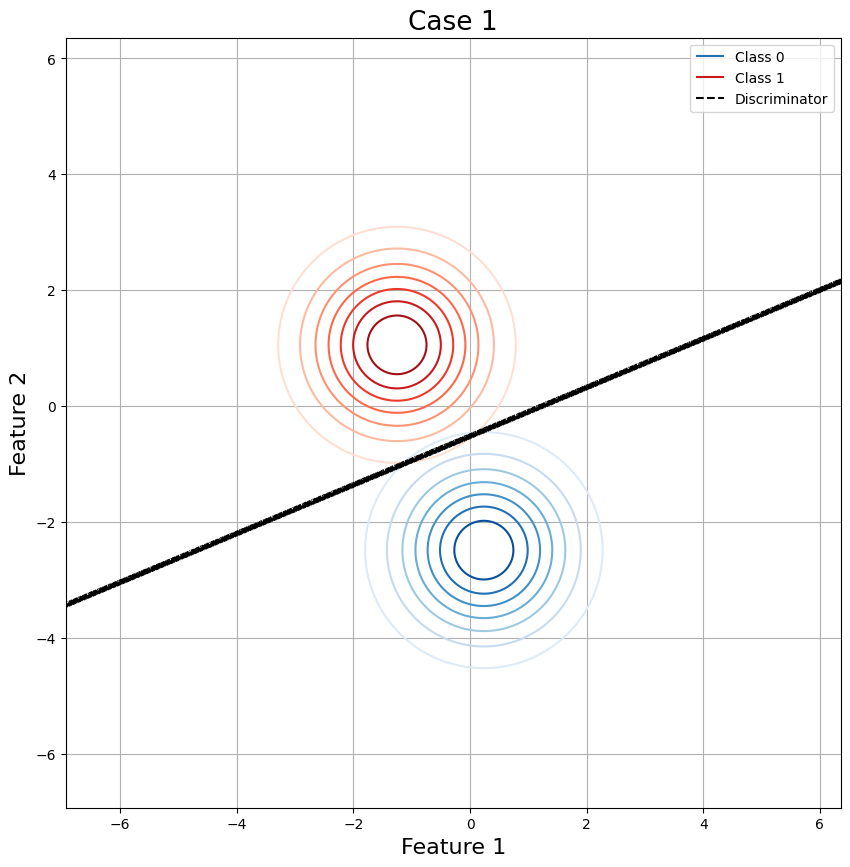

In [314]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
c1 = ax.contour(X0,X1,Y0_1,cmap='Blues')
c2 = ax.contour(X0,X1,Y1_1,cmap='Reds')
l = ax.contour(X0,X1,Z,colors='black')
ax.set_xlabel('Feature 1',fontsize='16')
ax.set_ylabel('Feature 2',fontsize='16')
ax.set_title('Case 1',fontsize='19')
#ax.set_xlim(-6,3)
#ax.set_ylim(-6.5,6.5)

ax.grid('on')
h1,l1 = c1.legend_elements()
h2,l1 = c2.legend_elements()
h3,l1 = l.legend_elements()
plt.legend([h1[-3], h2[-3], h3[0]], ['Class 0', 'Class 1', 'Discriminator'])
plt.show()

#### Case 2:

In [315]:
#Function for Contour and Discriminant 
#Computationally slightly heavy (about 2m)
Y0_2 = np.zeros([N,N])
Y1_2 = np.zeros([N,N])
Z2 = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        Y0_2[i,j] = Gaussian([x0[i],x1[j]],mu_0,Sig_0_b)
        Y1_2[i,j] = Gaussian([x0[i],x1[j]],mu_1,Sig_1_b)
        tmp = Bayes_Discriminator([x0[i],x1[j]],mu_0,mu_1,Sig_0_b,Sig_1_b,p_0,p_1,1,1)
        if(tmp<0.3 and tmp>-0.3):
            Z2[i,j]=tmp
Z2[Z2==0] = np.nan#when value is nan, matplotlib does not plot the corresponding values, this is an effective way of plotting f(x) = c 

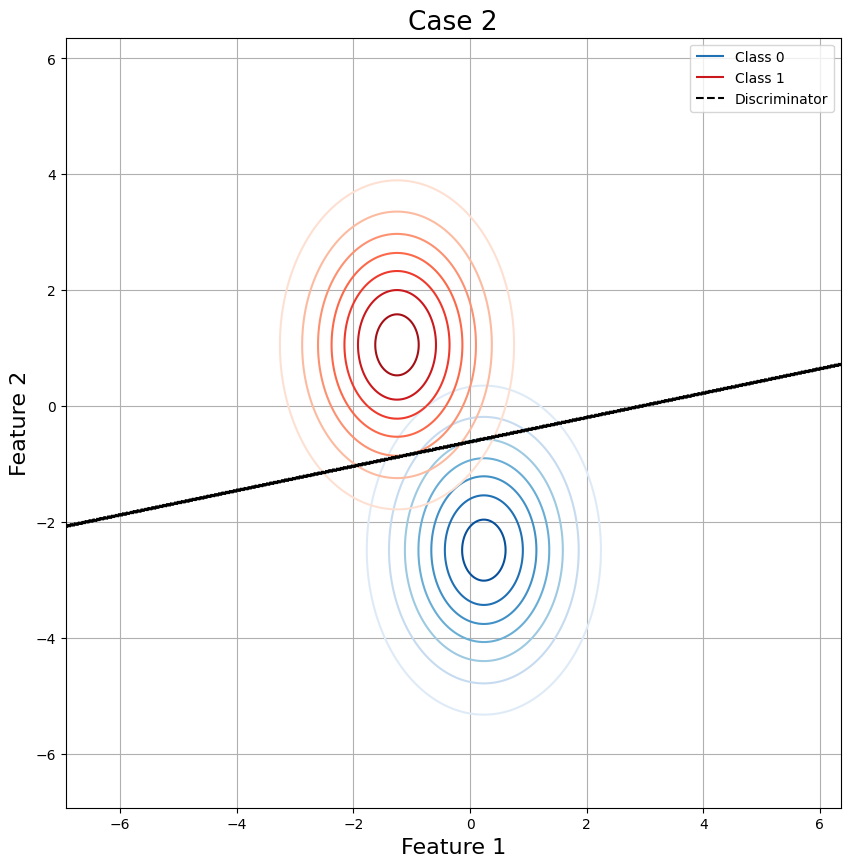

In [316]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
c1 = ax.contour(X0,X1,Y0_2,cmap='Blues')
c2 = ax.contour(X0,X1,Y1_2,cmap='Reds')
l = ax.contour(X0,X1,Z2,colors='black')
ax.set_xlabel('Feature 1',fontsize='16')
ax.set_ylabel('Feature 2',fontsize='16')
ax.set_title('Case 2',fontsize='19')
#ax.set_xlim(-6,5)
ax.grid('on')
h1,l1 = c1.legend_elements()
h2,l1 = c2.legend_elements()
h3,l1 = l.legend_elements()
plt.legend([h1[-3], h2[-3], h3[0]], ['Class 0', 'Class 1', 'Discriminator'])
plt.show()

#### Case 3:

In [317]:
#Function for Contour and Discriminant 
#Computationally slightly heavy (about 2m)
Y0_3 = np.zeros([N,N])
Y1_3 = np.zeros([N,N])
Z3 = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        Y0_3[i,j] = Gaussian([x0[i],x1[j]],mu_0,Sig_0_c)
        Y1_3[i,j] = Gaussian([x0[i],x1[j]],mu_1,Sig_1_c)
        tmp = Bayes_Discriminator([x0[i],x1[j]],mu_0,mu_1,Sig_0_c,Sig_1_c,p_0,p_1,1,1)
        if(tmp<0.3 and tmp>-0.3):
            Z3[i,j]=tmp
Z3[Z3==0] = np.nan#when value is nan, matplotlib does not plot the corresponding values, this is an effective way of plotting f(x) = c 

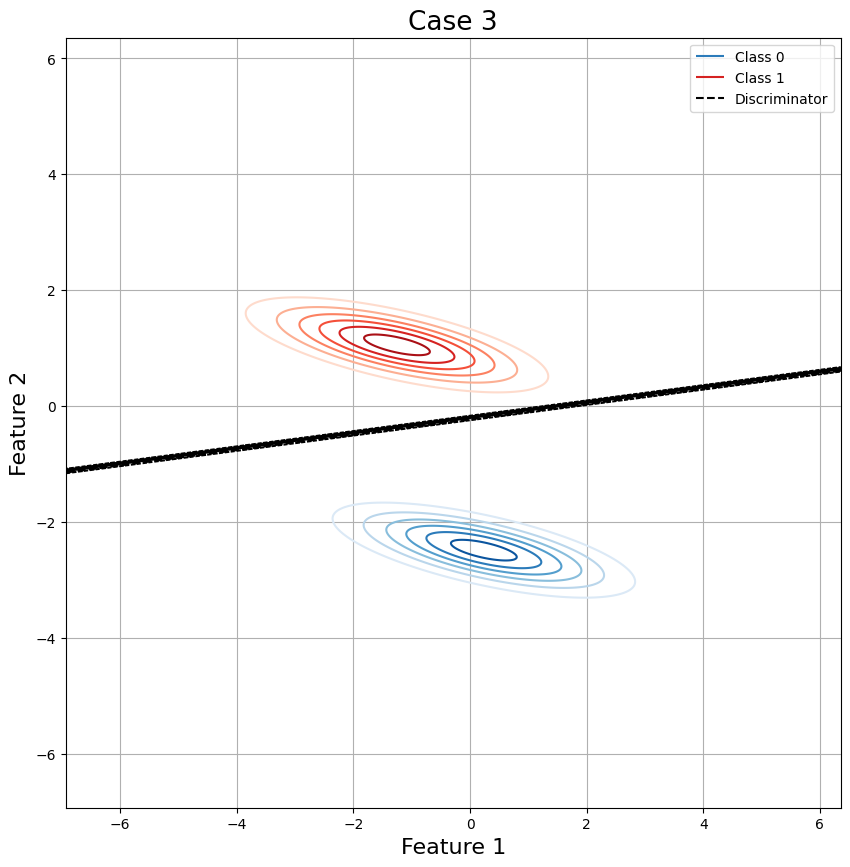

In [318]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
c1 = ax.contour(X0,X1,Y0_3,cmap='Blues')
c2 = ax.contour(X0,X1,Y1_3,cmap='Reds')
l = ax.contour(X1,X0,Z3,colors='black')
ax.set_xlabel('Feature 1',fontsize='16')
ax.set_ylabel('Feature 2',fontsize='16')
ax.set_title('Case 3',fontsize='19')
#ax.set_xlim(-6,5)
#ax.set_ylim(-3.2,2.5)
ax.grid('on')
h1,l1 = c1.legend_elements()
h2,l1 = c2.legend_elements()
h3,l1 = l.legend_elements()
plt.legend([h1[-3], h2[-3], h3[0]], ['Class 0', 'Class 1', 'Discriminator'])
plt.show()

#### Case 4:

In [319]:
#Function for Contour and Discriminant 
#Computationally slightly heavy (about 2m)
Y0_4 = np.zeros([N,N])
Y1_4 = np.zeros([N,N])
Z4 = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        Y0_4[i,j] = Gaussian([x0[i],x1[j]],mu_0,Sig_0_d)
        Y1_4[i,j] = Gaussian([x0[i],x1[j]],mu_1,Sig_1_d)
        tmp = Bayes_Discriminator([x0[i],x1[j]],mu_0,mu_1,Sig_0_d,Sig_1_d,p_0,p_1,1,1)
        if(tmp<0.3 and tmp>-0.3):
            Z4[i,j]=tmp
Z4[Z4==0] = np.nan#when value is nan, matplotlib does not plot the corresponding values, this is an effective way of plotting f(x) = c 

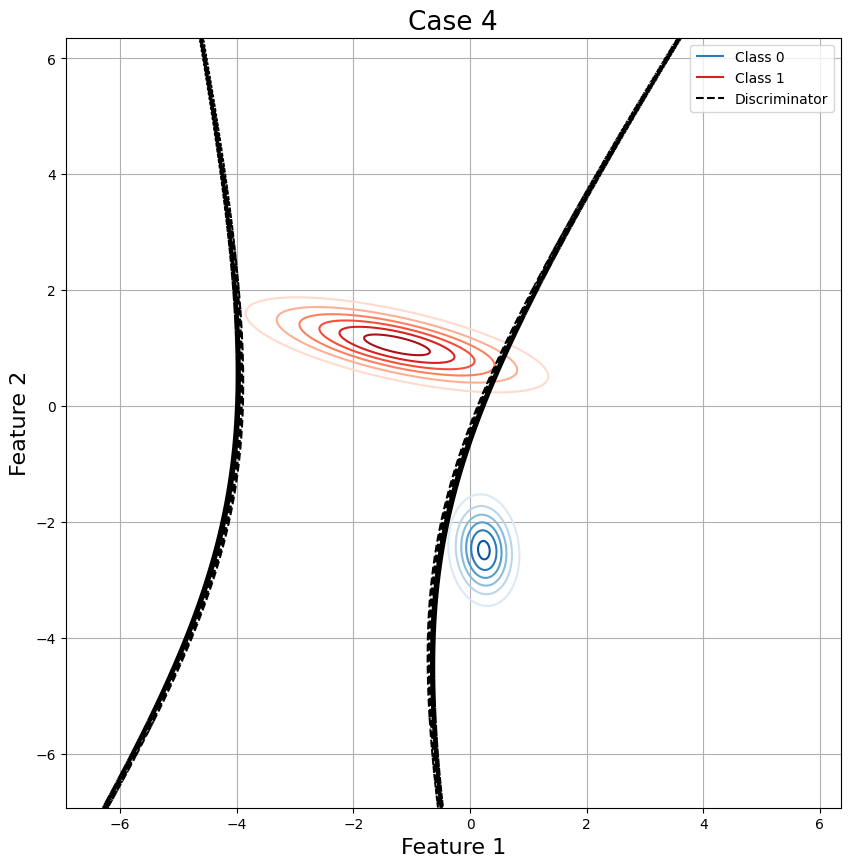

In [320]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
c1 = ax.contour(X0,X1,Y0_4,cmap='Blues')
c2 = ax.contour(X0,X1,Y1_4,cmap='Reds')
l = ax.contour(X0,X1,Z4,colors='black')
ax.set_xlabel('Feature 1',fontsize='16')
ax.set_ylabel('Feature 2',fontsize='16')
ax.set_title('Case 4',fontsize='19')
ax.grid('on')
h1,l1 = c1.legend_elements()
h2,l1 = c2.legend_elements()
h3,l1 = l.legend_elements()
plt.legend([h1[-3], h2[-3], h3[0]], ['Class 0', 'Class 1', 'Discriminator'])
plt.show()

## Conclusions

These were the covariance matrices selected for the question

$\textbf{Case 1}$: 
$$
\begin{equation}
\Sigma_{0} = \Sigma_{1} = \left[ \begin{array}{rrrr} 1 & 0 \\ 0 & 1 \end{array}\right]
\end{equation}
$$
$\textbf{Case 2}$: 
$$
\begin{equation}
\Sigma_{0} = \Sigma_{1} = \left[ \begin{array}{rrrr} 0.5 & 0 \\ 0 & 1 \end{array}\right]
\end{equation}
$$
$\textbf{Case 3}$: 
$$
\begin{equation}
\Sigma_{0} = \Sigma_{1} = \left[ \begin{array}{rrrr} 10 & 0.2 \\ 4 & 1 \end{array}\right]
\end{equation}
$$
$\textbf{Case 4}$: 
$$
\begin{equation}
\Sigma_{0} =  \left[ \begin{array}{rrrr} 4 & 1 \\ 0.2 & 10 \end{array}\right], \Sigma_{1} = \left[ \begin{array}{rrrr} 10 & 0.2 \\ 4 & 1 \end{array}\right]
\end{equation}
$$

Misclassification Rates and Accuracy score were as follows:

| Case No: | False Positive (0 as 1) | False Negative (1 as 0) | Accuracy Score |
| -------- | ----------------------- | ----------------------- | -------------- |
|1|3.33|0|96.67|
|2|6.67|1.11|92.22|
|3|0|4.44|95.55|
|4|16.67|0|83.33|
